In [1]:
import pandas as pd
import os

df_all = pd.read_csv('./extracted_med_papers.csv')   # load df however you normally do

wordcounts = []  # store wordcounts for each row

for row in df_all.itertuples():
    accession_id = row[1]

    # Build the file path (adjust extension or directory as needed)
    filepath = f'./extracted/{accession_id}.txt'

    # Default count
    count = 0
    
    # Check file exists
    with open(filepath, 'r') as f:
        text = f.read()
        count = len(text.split())   # simple word count

    wordcounts.append(count)

# Add column to DataFrame
df_all['Wordcount'] = wordcounts


In [2]:
df_all

,AccessionID,JournalID,JIF,Wordcount
0,PMC9439785,"0025-7974,1536-5964,",1.4,4370
1,PMC9159206,"1368-5031,1742-1241,",2.4,6402
2,PMC10685901,"1029-2977,1735-3947,1029-2977,",1.0,467
3,PMC9718913,"2050-0904,",0.6,1382
4,PMC10759104,"2044-6055,",2.3,5247
...,...,...,...,...
118557,PMC10571083,"0002-7863,1520-5126,",15.7,5027
118558,PMC9147456,"2077-0383,",2.9,2748
118559,PMC9696955,"2077-0383,",2.9,5683
118560,PMC9701189,"2041-1723,",15.7,5983


In [3]:
from sklearn.utils import shuffle
df = df_all
df = df[df['JIF'] < 50]
df = df[df['Wordcount'] < 50000]
df=df.drop(['AccessionID'],axis=1)
df=df.drop(['JournalID'],axis=1)
df

,JIF,Wordcount
0,1.4,4370
1,2.4,6402
2,1.0,467
3,0.6,1382
4,2.3,5247
...,...,...
118557,15.7,5027
118558,2.9,2748
118559,2.9,5683
118560,15.7,5983


In [4]:
import numpy as np
train_count = int(len(df)*0.9)
test_count = int(len(df)*0.1)
train=df.iloc[:train_count]
test=df.iloc[-test_count:]

train_samples=train['JIF'].tolist()
test_samples=test['JIF'].tolist()
train_samples = np.array(train_samples).reshape(-1,1)
test_samples = np.array(test_samples).reshape(-1,1)

train_labels=train['Wordcount'].tolist()
test_labels=test['Wordcount'].tolist()
print(len(train_labels), len(test_labels))

from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor(n_estimators = 1000, random_state = 50, n_jobs=-1)
rf.fit(train_samples, train_labels)
predictions = rf.predict(test_samples)


105654 11739


In [5]:
dif=predictions - test_labels
mean_absolute_dif = sum(abs(predictions - test_labels))/len(predictions)

from scipy.stats import pearsonr
r=pearsonr(predictions, test_labels)
r

PearsonRResult(statistic=np.float64(0.6787887925011653), pvalue=np.float64(0.0))

In [6]:
jif_list = df['JIF'].tolist()
wordcount_list = df['Wordcount'].tolist()
jifs = np.array(jif_list).reshape(-1, 1)       # shape (n_samples, 1)
wordcounts = np.array(wordcount_list)                # shape (n_samples,)

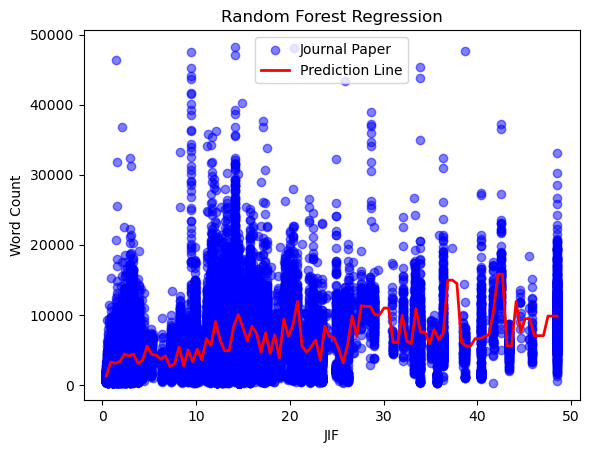

In [7]:
import matplotlib.pyplot as plt

# Scatter: predicted vs actual
plt.scatter(jifs, wordcounts, alpha=0.5, color='blue', label='Journal Paper')

x_axis = np.linspace(jifs.min(), jifs.max(),100).reshape(-1, 1)
predictions = rf.predict(x_axis)
plt.plot(x_axis, predictions, color='red', linewidth=2, label='Prediction Line')

plt.xlabel('JIF')
plt.ylabel('Word Count')
plt.title('Random Forest Regression')
plt.legend()
plt.savefig('./random_forest_regression_<50.png')
plt.show()

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(jifs, wordcounts)
reg.score(jifs, wordcounts), reg.coef_, reg.intercept_

(0.17517156937836464, array([164.66290788]), np.float64(3408.774995661528))

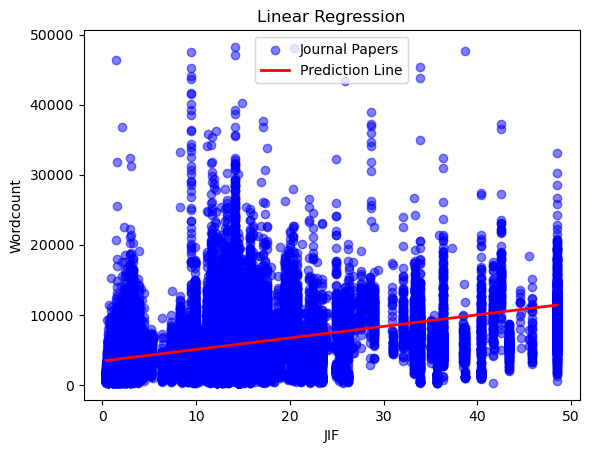

In [9]:
import matplotlib.pyplot as plt

plt.scatter(jifs, wordcounts, color='blue', alpha=0.5, label='Journal Papers')

x_axis = np.linspace(jifs.min(), jifs.max()).reshape(-1, 1)
predictions = reg.predict(x_axis)

plt.plot(x_axis, predictions, color='red', linewidth=2, label='Prediction Line')

plt.xlabel('JIF')
plt.ylabel('Wordcount')
plt.title('Linear Regression')
plt.legend()
plt.savefig('./linear_regression_<50.png')
plt.show()

In [10]:
predictions = reg.predict(jifs)
dif=predictions - wordcounts
mean_absolute_dif = sum(abs(predictions - wordcounts))/len(predictions)

from scipy.stats import pearsonr
r=pearsonr(predictions , wordcounts)
r

PearsonRResult(statistic=np.float64(0.4185350276600092), pvalue=np.float64(0.0))